<a href="https://colab.research.google.com/github/bonareri/Machine_Learning_1/blob/main/ML_Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [30]:
# Load the dataset
file_path = '/content/chip_dataset.csv'
chip_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
chip_data.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


## Data Cleaning

In [31]:
# Drop the redundant index column
chip_data = chip_data.drop(columns=["Unnamed: 0"])

# Standardize column names for consistency
chip_data.columns = chip_data.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

# Display basic information about the dataset, including missing values
chip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product              4854 non-null   object 
 1   type                 4854 non-null   object 
 2   release_date         4854 non-null   object 
 3   process_size_nm      4845 non-null   float64
 4   tdp_w                4228 non-null   float64
 5   die_size_mm^2        4139 non-null   float64
 6   transistors_million  4143 non-null   float64
 7   freq_mhz             4854 non-null   float64
 8   foundry              4854 non-null   object 
 9   vendor               4854 non-null   object 
 10  fp16_gflops          536 non-null    float64
 11  fp32_gflops          1948 non-null   float64
 12  fp64_gflops          1306 non-null   float64
dtypes: float64(8), object(5)
memory usage: 493.1+ KB


In [32]:
# Calculate percentage of missing data for each column
missing_percentage = chip_data.isnull().mean() * 100

# Display columns sorted by percentage of missing data
missing_percentage.sort_values(ascending=False)

,0
fp16_gflops,88.957561
fp64_gflops,73.094355
fp32_gflops,59.868150
die_size_mm^2,14.730119
transistors_million,14.647713
tdp_w,12.896580
process_size_nm,0.185414
product,0.000000
type,0.000000
release_date,0.000000


### Dropping non-consequntial fields

In [33]:
# Dropping columns with more than 50% missing values
threshold = 0.5  # Set the threshold for missingness
chip_data = chip_data.loc[:, chip_data.isnull().mean() <= threshold]

In [34]:
chip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product              4854 non-null   object 
 1   type                 4854 non-null   object 
 2   release_date         4854 non-null   object 
 3   process_size_nm      4845 non-null   float64
 4   tdp_w                4228 non-null   float64
 5   die_size_mm^2        4139 non-null   float64
 6   transistors_million  4143 non-null   float64
 7   freq_mhz             4854 non-null   float64
 8   foundry              4854 non-null   object 
 9   vendor               4854 non-null   object 
dtypes: float64(5), object(5)
memory usage: 379.3+ KB


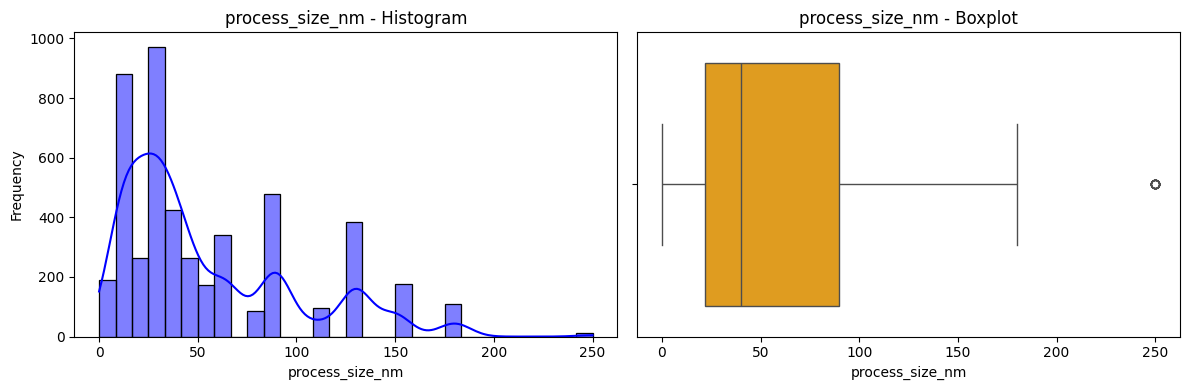

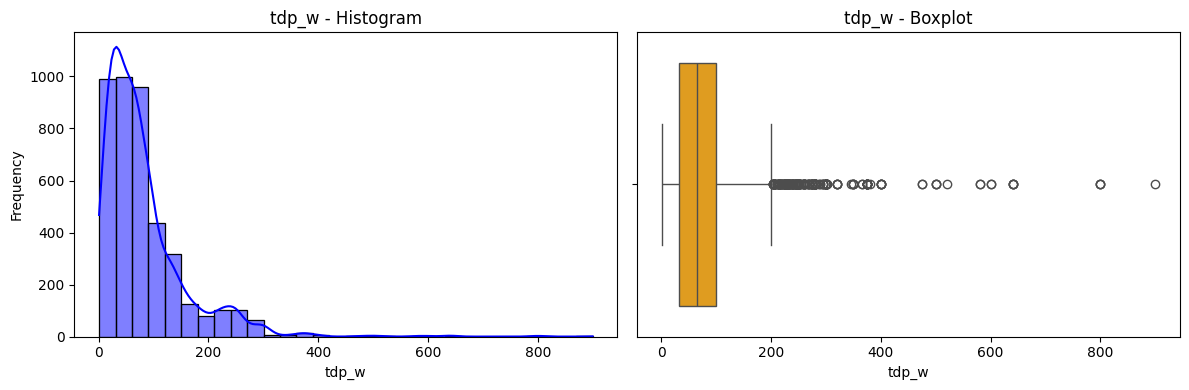

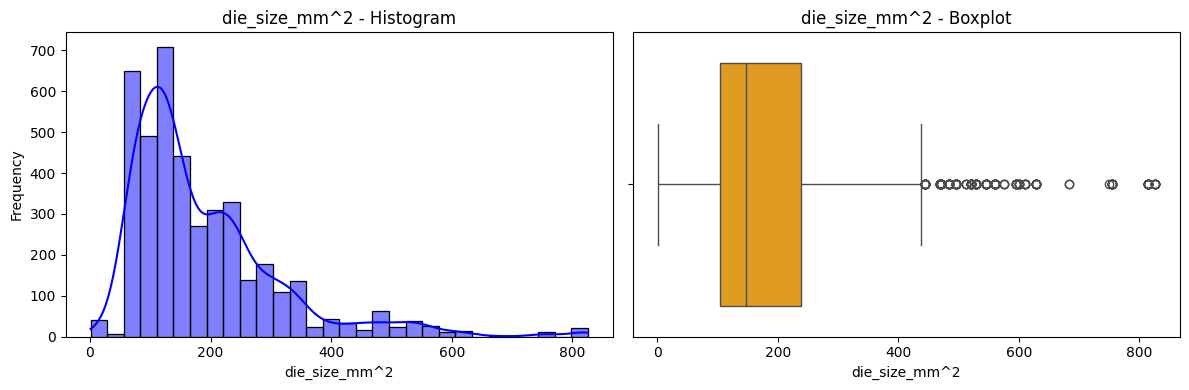

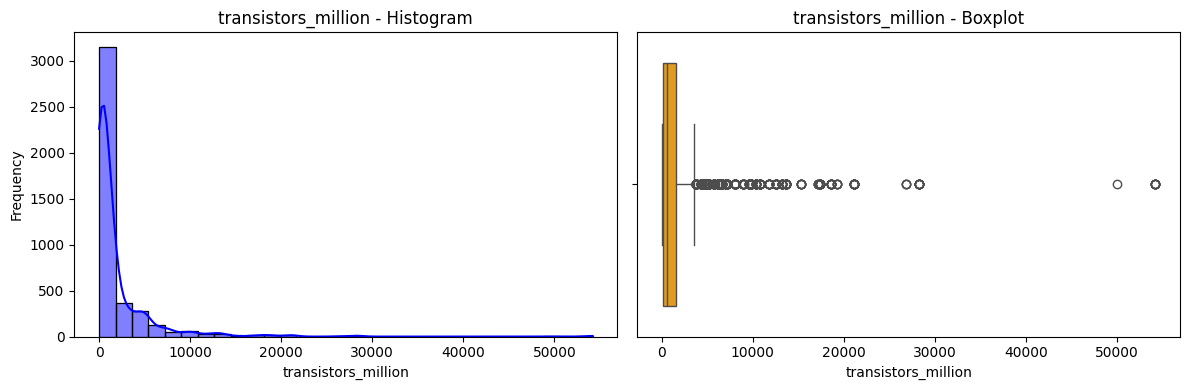

In [35]:
# List of numeric columns to check distributions
numeric_columns = ['process_size_nm', 'tdp_w', 'die_size_mm^2', 'transistors_million']

# Step 1: Visualize the distributions
for column in numeric_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create side-by-side plots

    # Histogram with KDE
    sns.histplot(chip_data[column], kde=True, bins=30, color='blue', ax=axes[0])
    axes[0].set_title(f'{column} - Histogram')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=chip_data[column], color='orange', ax=axes[1])
    axes[1].set_title(f'{column} - Boxplot')
    axes[1].set_xlabel(column)

    # Display the plots
    plt.tight_layout()
    plt.show()

### imputation by median

In [36]:
# List of numeric columns for imputation
numeric_columns = ['process_size_nm', 'tdp_w', 'die_size_mm^2', 'transistors_million']

# Perform median imputation
for column in numeric_columns:
    median_value = chip_data[column].median()
    chip_data[column].fillna(median_value, inplace=True)
    print(f"{column}: Imputed missing values with median = {median_value}")

process_size_nm: Imputed missing values with median = 40.0
tdp_w: Imputed missing values with median = 65.0
die_size_mm^2: Imputed missing values with median = 148.0
transistors_million: Imputed missing values with median = 624.0


<ipython-input-36-1166f722bc3f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chip_data[column].fillna(median_value, inplace=True)


In [37]:
#check missing values
chip_data.isnull().sum()

,0
product,0
type,0
release_date,0
process_size_nm,0
tdp_w,0
die_size_mm^2,0
transistors_million,0
freq_mhz,0
foundry,0
vendor,0


### Transforming release_date to the corrrect format (date time)

In [38]:
# Convert `release_date` to datetime format
chip_data['release_date'] = pd.to_datetime(chip_data['release_date'], errors='coerce')

# Summary of invalid date conversions (if any)
invalid_dates = chip_data['release_date'].isnull().sum()

# Output the number of invalid dates, and display any rows with invalid dates
print(f"Number of invalid release_date values: {invalid_dates}")
print("\nRows with invalid release_date:")
print(chip_data[chip_data['release_date'].isnull()])

# Perform forward fill to fill missing release_date values
chip_data['release_date'].fillna(method='ffill', inplace=True)

# Display the updated data with filled values for release_date
print("\nData after filling missing release_date values with forward fill:")
print(chip_data[['product', 'release_date']].head(10))  # Displaying the first 10 rows as an example


Number of invalid release_date values: 75

Rows with invalid release_date:
                        product type release_date  process_size_nm  tdp_w  \
68         Intel Core i7-9850HE  CPU          NaT             14.0   45.0   
1558       Intel Core i7-9850HL  CPU          NaT             14.0   25.0   
2026      Intel Core i9-10990XE  CPU          NaT             14.0  380.0   
2221     NVIDIA Jetson Nano GPU  GPU          NaT             20.0   10.0   
2237          3dfx Spectre 1000  GPU          NaT            180.0   30.0   
...                         ...  ...          ...              ...    ...   
4737           Intel Xe DG1 OEM  GPU          NaT             10.0   30.0   
4798  NVIDIA Quadro T400 Mobile  GPU          NaT             12.0   18.0   
4810      AMD Radeon Pro V7300X  GPU          NaT             14.0  130.0   
4820         AMD FirePro W4130M  GPU          NaT             28.0   65.0   
4833        AMD Radeon R9 280X2  GPU          NaT             28.0  375.0   



<ipython-input-38-ecf5308f7e67>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chip_data['release_date'].fillna(method='ffill', inplace=True)
<ipython-input-38-ecf5308f7e67>:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chip_data['release_date'].fillna(method='ffill', inplace=True)


In [39]:
chip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   product              4854 non-null   object        
 1   type                 4854 non-null   object        
 2   release_date         4854 non-null   datetime64[ns]
 3   process_size_nm      4854 non-null   float64       
 4   tdp_w                4854 non-null   float64       
 5   die_size_mm^2        4854 non-null   float64       
 6   transistors_million  4854 non-null   float64       
 7   freq_mhz             4854 non-null   float64       
 8   foundry              4854 non-null   object        
 9   vendor               4854 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 379.3+ KB


In [41]:
# Check unique values for each categorical column
type_categories = chip_data['type'].unique()
vendor_categories = chip_data['vendor'].unique()
foundry_categories = chip_data['foundry'].unique()
product_categories = chip_data['product'].unique()

# Display the unique categories for each column
print("Unique categories in 'type':", type_categories)
print("Unique categories in 'vendor':", vendor_categories)
print("Unique categories in 'foundry':", foundry_categories)
print("Unique categories in 'product':", product_categories)

Unique categories in 'type': ['CPU' 'GPU']
Unique categories in 'vendor': ['AMD' 'Intel' 'Other' 'NVIDIA' 'ATI']
Unique categories in 'foundry': ['Unknown' 'Intel' 'GF' 'TSMC' 'UMC' 'Samsung' 'Renesas' 'Sony' 'NEC'
 'IBM']
Unique categories in 'product': ['AMD Athlon 64 3500+' 'AMD Athlon 200GE' 'Intel Core i5-1145G7' ...
 'NVIDIA GeForce FX Go5100' 'NVIDIA Quadro 3000M' 'NVIDIA GeForce 9300 SE']


### Converting categorical variables into numeric values for machine learning models.

#### Encoding techniques:

- Label Encoding: Assign a unique integer to each category in a column.
- One-Hot Encoding: Create a binary column for each category.

Given the nature of the dataset:

1. type:
- Categories: ['CPU', 'GPU']
- Encoding Strategy: Since there are only two categories, Label Encoding is appropriate. You can assign 0 to 'CPU' and 1 to 'GPU'.
2. vendor:
- Categories: ['AMD', 'Intel', 'Other', 'NVIDIA', 'ATI']
- Encoding Strategy: Since there are multiple unique categories, One-Hot Encoding is the best choice. This will create a binary column for each vendor.
3. foundry:
- Categories: ['Unknown', 'Intel', 'GF', 'TSMC', 'UMC', 'Samsung', 'Renesas', 'Sony', 'NEC', 'IBM']
- Encoding Strategy: With a larger number of categories, One-Hot Encoding is appropriate. This will create a binary column for each foundry.


### Label Encoding for the type column

In [42]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'type' column (GPU, CPU, etc.)
chip_data['type_encoded'] = label_encoder.fit_transform(chip_data['type'])

# Display the updated dataframe with the encoded 'type' column
chip_data[['type', 'type_encoded']].head()

,type,type_encoded
0,CPU,0
1,CPU,0
2,CPU,0
3,CPU,0
4,CPU,0


### One-Hot Encoding for vendor and foundry columns

In [43]:
# Use One-Hot Encoding for the 'vendor' column
chip_data = pd.get_dummies(chip_data, columns=['vendor'], drop_first=True)

# Use One-Hot Encoding for the 'foundry' column
chip_data = pd.get_dummies(chip_data, columns=['foundry'], drop_first=True)

# Display the updated dataframe with encoded 'vendor' and 'foundry' columns
chip_data.head()

,product,type,release_date,process_size_nm,tdp_w,die_size_mm^2,transistors_million,freq_mhz,type_encoded,vendor_ATI,...,vendor_Other,foundry_IBM,foundry_Intel,foundry_NEC,foundry_Renesas,foundry_Samsung,foundry_Sony,foundry_TSMC,foundry_UMC,foundry_Unknown
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,0,False,...,False,False,False,False,False,False,False,False,False,True
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,0,False,...,False,False,False,False,False,False,False,False,False,True
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,148.0,624.0,2600.0,0,False,...,False,False,True,False,False,False,False,False,False,False
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,0,False,...,False,False,True,False,False,False,False,False,False,False
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,0,False,...,False,False,False,False,False,False,False,False,False,True


In [44]:
# Check the first few rows of the dataframe after encoding
chip_data.head()

,product,type,release_date,process_size_nm,tdp_w,die_size_mm^2,transistors_million,freq_mhz,type_encoded,vendor_ATI,...,vendor_Other,foundry_IBM,foundry_Intel,foundry_NEC,foundry_Renesas,foundry_Samsung,foundry_Sony,foundry_TSMC,foundry_UMC,foundry_Unknown
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,0,False,...,False,False,False,False,False,False,False,False,False,True
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,0,False,...,False,False,False,False,False,False,False,False,False,True
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,148.0,624.0,2600.0,0,False,...,False,False,True,False,False,False,False,False,False,False
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,0,False,...,False,False,True,False,False,False,False,False,False,False
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,0,False,...,False,False,False,False,False,False,False,False,False,True


##  Exploratory Data Analysis (EDA)

### a. Moore's Law (Doubling of Transistor Density)

Moore's Law states that the number of transistors in a microchip doubles approximately every 2 years.

- Hypothesis: Transistor count increases significantly over time (indicating Moore's Law).

- visualize transistors_million against release_date and check for exponential growth in transistor counts over time, especially for GPUs.

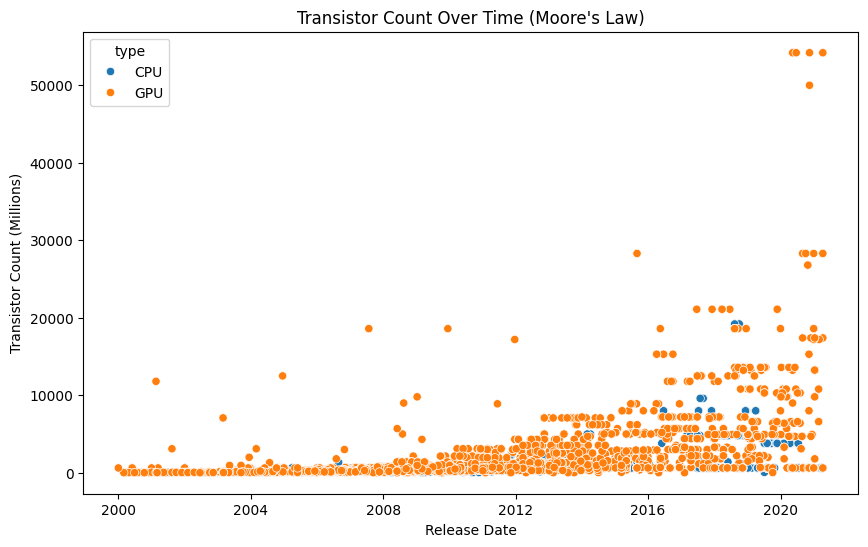

In [45]:
# 1. Moore's Law: Transistor count over time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=chip_data, x='release_date', y='transistors_million', hue='type')
plt.title("Transistor Count Over Time (Moore's Law)")
plt.xlabel("Release Date")
plt.ylabel("Transistor Count (Millions)")
plt.show()

### b. Dennard Scaling (Power vs. Size)
Dennard scaling suggests that as transistors become smaller, power density remains constant. This means that while transistor count increases, the power usage for the same chip size should not increase.

- Hypothesis: As process_size_nm decreases, tdp_w and die_size_mm^2 (power and size) should not increase drastically for similar performance.

- analyze the relationship between process_size_nm, tdp_w, and die_size_mm^2 over time.

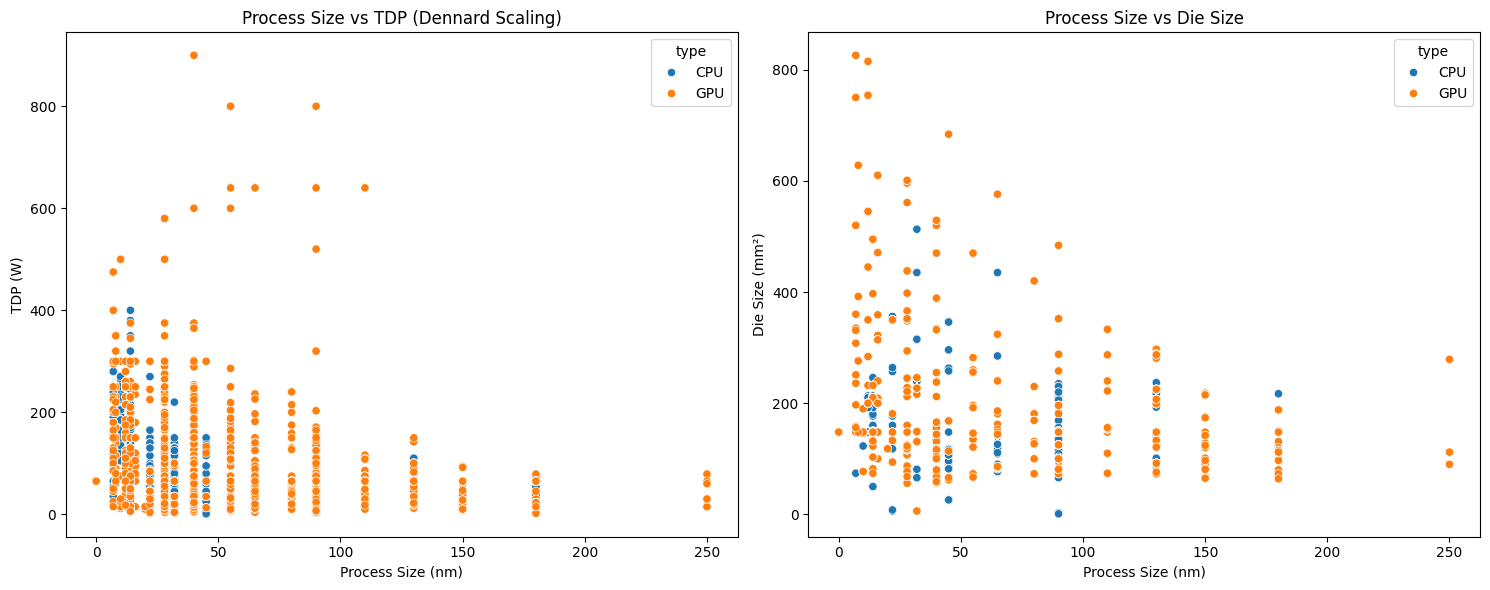

In [48]:
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for Process Size vs TDP
sns.scatterplot(data=chip_data, x='process_size_nm', y='tdp_w', hue='type', ax=axes[0])
axes[0].set_title("Process Size vs TDP (Dennard Scaling)")
axes[0].set_xlabel("Process Size (nm)")
axes[0].set_ylabel("TDP (W)")

# Scatter plot for Process Size vs Die Size
sns.scatterplot(data=chip_data, x='process_size_nm', y='die_size_mm^2', hue='type', ax=axes[1])
axes[1].set_title("Process Size vs Die Size")
axes[1].set_xlabel("Process Size (nm)")
axes[1].set_ylabel("Die Size (mm²)")

# Adjust layout for better readability
plt.tight_layout()
plt.show()


### c. CPUs Have Higher Frequencies, but GPUs are Catching Up
- Hypothesis: CPUs generally have higher clock speeds (frequency in MHz) than GPUs, but over time, GPU frequencies are increasing and approaching CPU frequencies.

- plot freq_mhz by type (CPU vs GPU) and analyze the frequency trend over time.

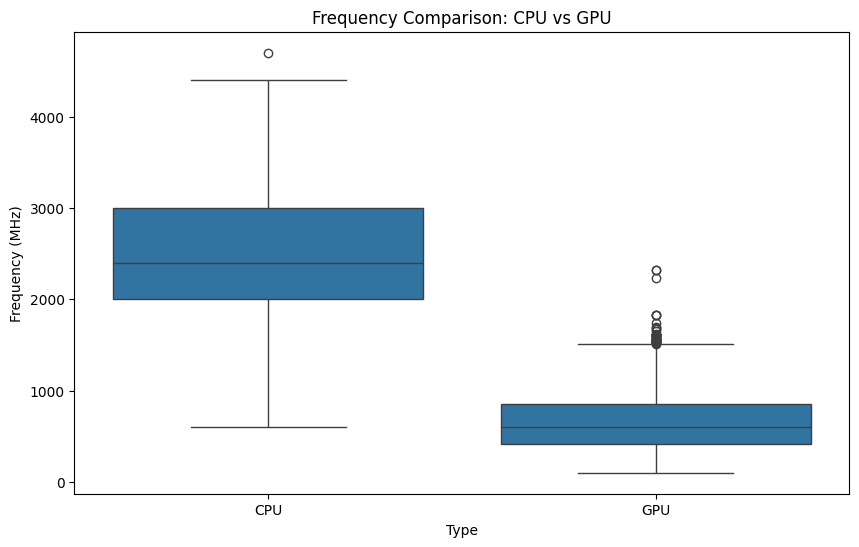

In [49]:
# 3. CPU vs GPU frequencies
plt.figure(figsize=(10, 6))
sns.boxplot(data=chip_data, x='type', y='freq_mhz')
plt.title("Frequency Comparison: CPU vs GPU")
plt.xlabel("Type")
plt.ylabel("Frequency (MHz)")
plt.show()

### d. GPU Performance Doubles Every 1.5 Years
- Hypothesis: The performance of GPUs, measured by some combination of transistors_million, freq_mhz, and die_size_mm^2, should approximately double every 1.5 years.

- calculate a performance score for GPUs and analyze the trend over time.

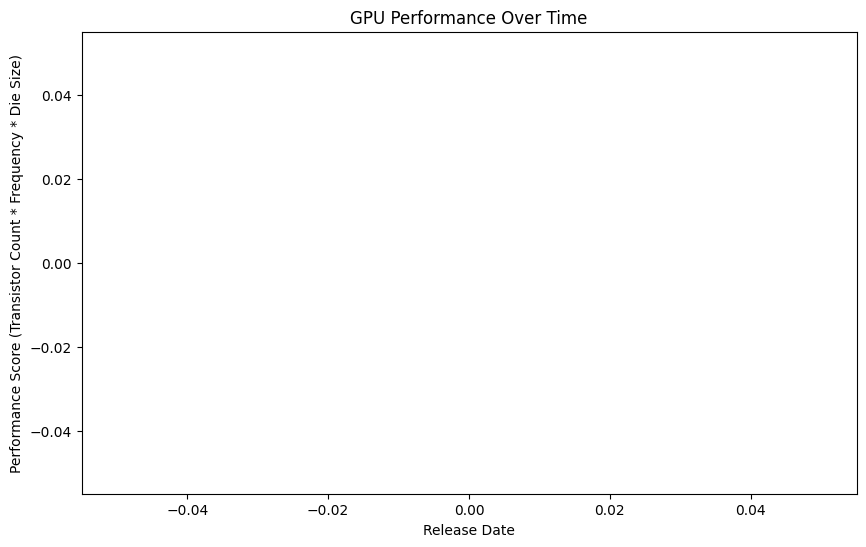

In [50]:
# 4. GPU Performance over time (Double every 1.5 years)
chip_data['performance_score'] = chip_data['transistors_million'] * chip_data['freq_mhz'] * chip_data['die_size_mm^2']
gpu_data = chip_data[chip_data['type'] == 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gpu_data, x='release_date', y='performance_score')
plt.title("GPU Performance Over Time")
plt.xlabel("Release Date")
plt.ylabel("Performance Score (Transistor Count * Frequency * Die Size)")
plt.show()

### e. GPU Performance Improvement is a Joint Effect of Smaller Transistors, Larger Die Size, and Higher Frequency
- Hypothesis: transistors_million, die_size_mm^2, and freq_mhz should all show a positive relationship with each other for GPU chips over time.

- perform a correlation analysis between these features for GPUs only.

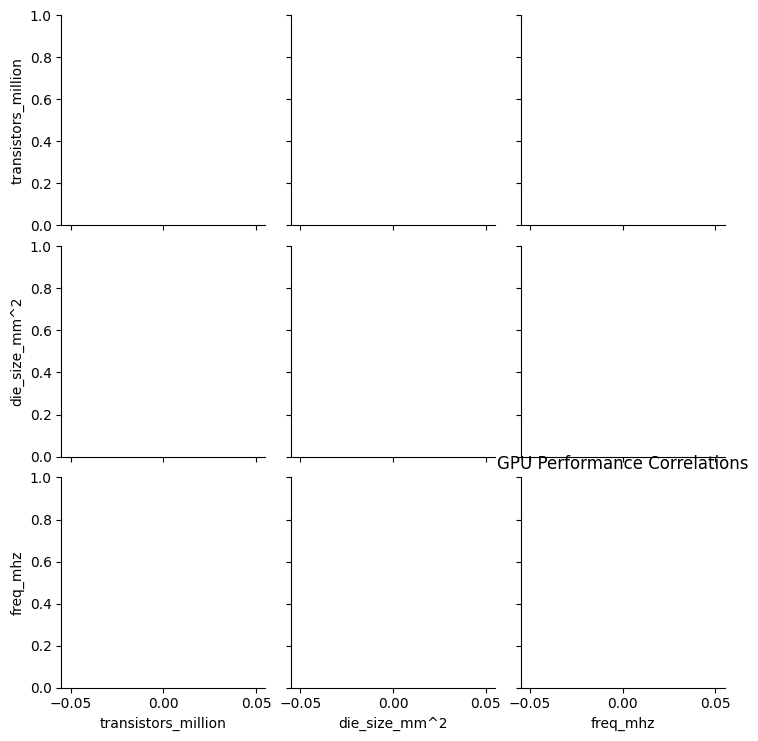

In [51]:
# 5. GPU Performance vs Transistors, Die Size, Frequency
sns.pairplot(gpu_data[['transistors_million', 'die_size_mm^2', 'freq_mhz']])
plt.title("GPU Performance Correlations")
plt.show()

### f. High-end GPUs Tend to Use New Semiconductor Technologies First, Low-end GPUs Use Old Technologies
- Hypothesis: High-end GPUs tend to use smaller process_size_nm first, while low-end GPUs use larger process sizes for longer periods.

- analyze the process_size_nm by type and vendor, specifically looking for patterns in the release of high vs low-end GPUs.

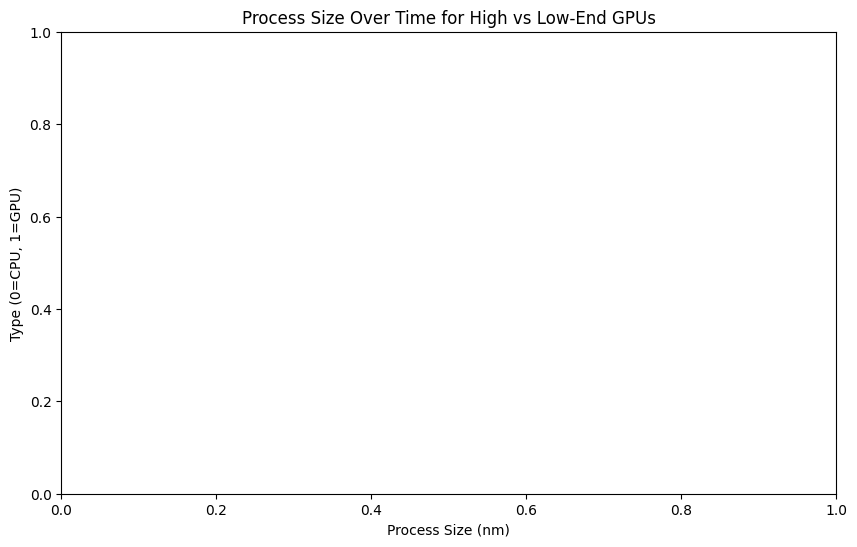

In [53]:
#6 High-end GPUs use new technologies first
plt.figure(figsize=(10, 6))
sns.boxplot(data=gpu_data, x='process_size_nm', y='type')
plt.title("Process Size Over Time for High vs Low-End GPUs")
plt.xlabel("Process Size (nm)")
plt.ylabel("Type (0=CPU, 1=GPU)")
plt.show()

### g. Process Size for Intel, AMD, and Nvidia is Lower Compared to ATI and Other Vendors
- Hypothesis: Intel, AMD, and Nvidia chips should have smaller process_size_nm compared to ATI and other vendors.

- compare process_size_nm across vendor categories.

In [54]:
# 7. Comparison of Process Size by Vendor
plt.figure(figsize=(10, 6))
sns.boxplot(data=chip_data, x='vendor_AMD', y='process_size_nm')
plt.title("Process Size by Vendor (AMD)")
plt.xlabel("Vendor")
plt.ylabel("Process Size (nm)")
plt.show()

ValueError: Could not interpret value `vendor_AMD` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

### h. TSMC Makes the Highest Number of Chips in the World
- Hypothesis: TSMC is likely the most frequent foundry used for manufacturing chips.

- analyze the frequency of foundry values and verify if TSMC is the most common foundry.

In [55]:
# 8. Frequency of TSMC foundry
foundry_counts = chip_data['foundry_TSMC'].sum()
print(f"Number of chips made by TSMC: {foundry_counts}")

Number of chips made by TSMC: 2178
